In [ ]:
# Digit Recognizer
# 1. Gether the data(MNIST Dataset)
# 2. Normalization
# 3. Neural Network Architecture 
# 4. Compile the Model 
# 5. Fit your Model(Training the machine)-Check for the validation 
# 6. Evaluate for the Data 
# 7. Save the model[Archiyecture,Model weights]

In [ ]:
# 1. Gather the data[MNIST Dataset] 
import tensorflow as tf 
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


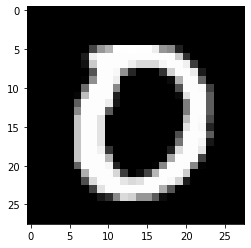

In [ ]:
import matplotlib.pyplot as plt
i = 458
plt.imshow(x_train[i],cmap='gray')
plt.show()

In [ ]:
# 2. Normalization
print(x_train[0].max())
print(x_train[0].min())

255
0


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train = x_train/255
x_test= x_test/255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# 3. Neural Network Architecture  

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(1568,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1568)              1230880   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15690     
Total params: 1,246,570
Trainable params: 1,246,570
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4. Compile the Model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# 5. Fit your model (Training the machine )-- Check for Validation 
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1801 - accuracy: 0.9451
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0728 - accuracy: 0.9769
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0484 - accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0362 - accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0260 - accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0216 - accuracy: 0.9928
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0185 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0157 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0149 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - 

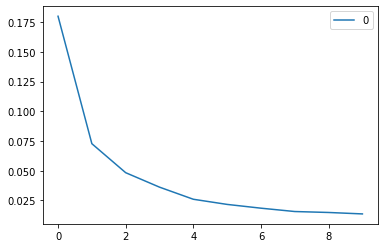

In [ ]:
import pandas as pd
loss = pd.DataFrame(model.history.history['loss']).plot()

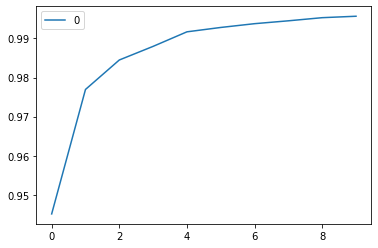

In [ ]:
acc = pd.DataFrame(model.history.history['accuracy']).plot()

In [ ]:
#6. Evalute for Test Data 
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9822

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 975,    0,    2,    1,    0,    0,    0,    0,    1,    1],
       [   0, 1120,    3,    1,    0,    1,    2,    6,    2,    0],
       [   0,    0, 1022,    1,    1,    0,    0,    4,    3,    1],
       [   1,    0,    3,  993,    0,    4,    0,    4,    3,    2],
       [   1,    0,    1,    1,  948,    0,    5,    5,    1,   20],
       [   2,    0,    0,    7,    1,  876,    2,    1,    2,    1],
       [   4,    2,    1,    1,    3,    3,  943,    0,    1,    0],
       [   1,    1,   10,    1,    0,    0,    0, 1006,    2,    7],
       [   3,    1,    3,    1,    3,    4,    0,    3,  949,    7],
       [   1,    3,    0,    1,    9,    3,    0,    2,    0,  990]])

In [ ]:
# 7. Save the Model[Architecture, Model Weights]
model.save('Digit Recognizer.hdf5')

In [ ]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    